<a href="https://colab.research.google.com/github/shreyas-sreedhar/gen-ai-csye7380/blob/main/Assignment-03/Assignment03_2_Shreyas_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSYE7380 - Assignment 03_2 - Shreyas Sreedhar

In [17]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib


B) Classify CIFAR 10 images with a CNN model but study the effect on the performance by varying the following modeling aspects:

1. Batch Normalization
2. Dropout
3. Number of convolution and pooling layers
4. Activation function

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np

In [19]:

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [20]:

X_train = X_train[:10000]  # Use only 10k samples for faster training
y_train = y_train[:10000]


In [21]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU

def create_model(num_conv_layers, dropout_rate, batch_norm, activation_func, dense_layers=[256], extra_conv_layers=0):
    model = models.Sequential()

    # Initial Conv Layer
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    if batch_norm:
        model.add(layers.BatchNormalization())

    if activation_func == 'leaky_relu':
        model.add(LeakyReLU())
    else:
        model.add(layers.Activation(activation_func))

    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(layers.Dropout(dropout_rate))

    # Add subsequent convolution layers
    for i in range(1, num_conv_layers):
        model.add(layers.Conv2D(64 * min(i, 2), (3, 3), padding='same'))
        if batch_norm and i % 2 == 0:
            model.add(layers.BatchNormalization())

        if activation_func == 'leaky_relu':
            model.add(LeakyReLU())
        else:
            model.add(layers.Activation(activation_func))

        if i % 2 == 0:
            model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
        model.add(layers.Dropout(dropout_rate))

    # Add extra convolution layers if needed
    for j in range(extra_conv_layers):
        model.add(layers.Conv2D(128, (3, 3), padding='same'))
        if batch_norm:
            model.add(layers.BatchNormalization())

        if activation_func == 'leaky_relu':
            model.add(LeakyReLU())
        else:
            model.add(layers.Activation(activation_func))

        model.add(layers.Dropout(dropout_rate))

    # Flatten before Dense layers
    model.add(layers.Flatten())

    # Add multiple Dense layers
    for units in dense_layers:
        model.add(layers.Dense(units))  # Dense layer with specified units
        if batch_norm:
            model.add(layers.BatchNormalization())

        if activation_func == 'leaky_relu':
            model.add(LeakyReLU())
        else:
            model.add(layers.Activation(activation_func))

        model.add(layers.Dropout(dropout_rate))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:

# # Testing only one secarnio
# scenarios2 = [
#     {'name': 'Best Case', 'num_conv_layers': 10, 'dropout_rate': 0.3, 'batch_norm': True, 'activation_func': 'relu'}
# ]


In [22]:

# Scenario 1: 10 conv, relu
scenario1 = {
    'num_conv_layers': 10,
    'dropout_rate': 0.3,
    'batch_norm': True,
    'activation_func': 'relu',
    'dense_layers': [128]
}

# Scenario 2: 8 conv, leaky_relu
scenario2 = {
    'num_conv_layers': 8,
    'dropout_rate': 0.1,
    'batch_norm': True,
    'activation_func': 'leaky_relu',
    'dense_layers': [64]
}

# Scenario 3: 10 conv, tanh
scenario3 = {
    'num_conv_layers': 10,
    'dropout_rate': 0.0,
    'batch_norm': False,
    'activation_func': 'tanh',
    'dense_layers': [256]
}



In [23]:
def plot_history(history, scenario_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{scenario_name} - Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{scenario_name} - Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.1212 - loss: 2.5611 - val_accuracy: 0.1000 - val_loss: 2.3746
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.1694 - loss: 2.1054 - val_accuracy: 0.1000 - val_loss: 2.7203
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.1827 - loss: 2.0295 - val_accuracy: 0.1001 - val_loss: 2.9150
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.1935 - loss: 1.9728 - val_accuracy: 0.1011 - val_loss: 3.0736
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.2145 - loss: 1.9305 - val_accuracy: 0.1081 - val_loss: 2.9040
313/313 - 20s - 65ms/step - accuracy: 0.1081 - loss: 2.9040
Scenario 1 Test Accuracy: 0.10809999704360962


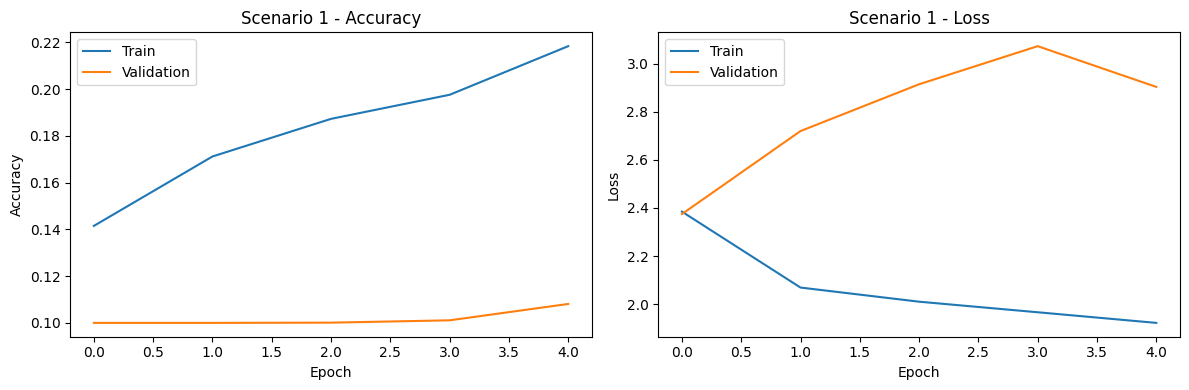

In [ ]:
# Create and train model for scenario 1
model1 = create_model(**scenario1)
history1 = model1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=128)
test_loss1, test_acc1 = model1.evaluate(X_test, y_test, verbose=2)
print(f"Scenario 1 Test Accuracy: {test_acc1}")
plot_history(history1, 'Scenario 1')

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.2831 - loss: 2.0241 - val_accuracy: 0.1000 - val_loss: 3.2780
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.4421 - loss: 1.5242 - val_accuracy: 0.1005 - val_loss: 3.5016
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.4957 - loss: 1.3492 - val_accuracy: 0.1790 - val_loss: 2.7126
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.5365 - loss: 1.2752 - val_accuracy: 0.1798 - val_loss: 2.7074
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5784 - loss: 1.1621 - val_accuracy: 0.2778 - val_loss: 2.3863
313/313 - 21s - 66ms/step - accuracy: 0.2778 - loss: 2.3863
Scenario 2 Test Accuracy: 0.2777999937534332


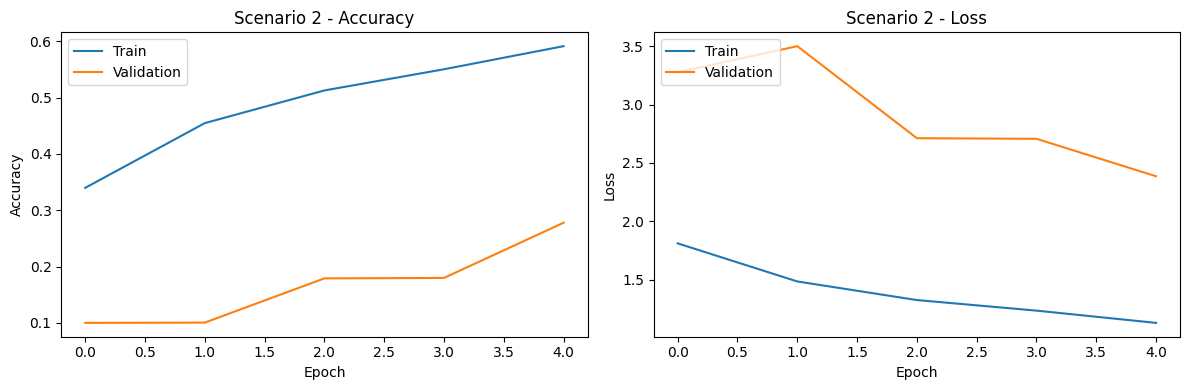

In [24]:
model2 = create_model(**scenario2)
history2 = model2.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=128)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test, verbose=2)

print(f"Scenario 2 Test Accuracy: {test_acc2}")
plot_history(history2, 'Scenario 2')


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.1895 - loss: 2.1496 - val_accuracy: 0.3111 - val_loss: 1.8973
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.3393 - loss: 1.7441 - val_accuracy: 0.3462 - val_loss: 1.7566
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4094 - loss: 1.5850 - val_accuracy: 0.4253 - val_loss: 1.5982
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4669 - loss: 1.4273 - val_accuracy: 0.4863 - val_loss: 1.4174
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5441 - loss: 1.2377 - val_accuracy: 0.5304 - val_loss: 1.3142
313/313 - 19s - 60ms/step - accuracy: 0.5304 - loss: 1.3142
Scenario 3 Test Accuracy: 0.5303999781608582


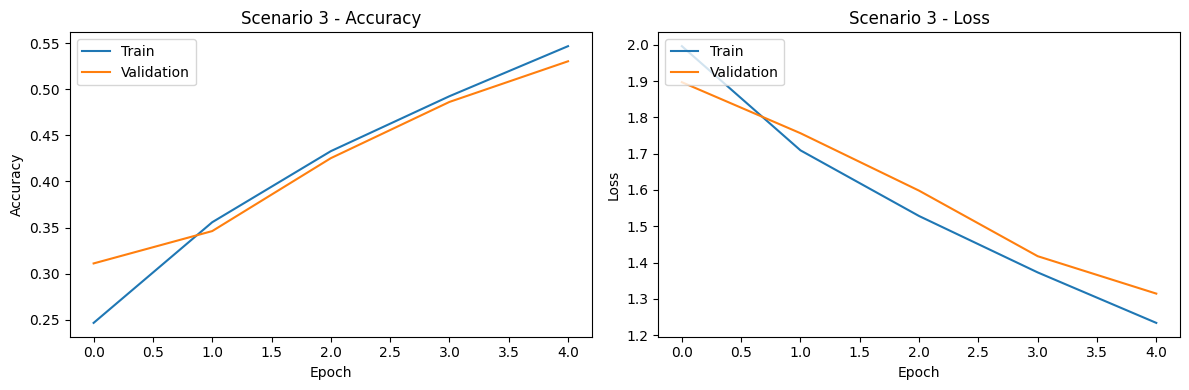

In [25]:
# Create and train model for scenario 3
model3 = create_model(**scenario3)
history3 = model3.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=128)
test_loss3, test_acc3 = model3.evaluate(X_test, y_test, verbose=2)
print(f"Scenario 3 Test Accuracy: {test_acc3}")
plot_history(history3, 'Scenario 3')


Other iterations and previous explorations

In [ ]:
# scenarios = [
#     {'name': 'Idea 1 - 5 conv, relu', 'num_conv_layers': 5, 'dropout_rate': 0.3, 'batch_norm': True, 'activation_func': 'relu', 'num_dense_neurons': 128},
#     {'name': 'Idea 2 - 3 conv, leaky_relu', 'num_conv_layers': 2, 'dropout_rate': 0.1, 'batch_norm': True, 'activation_func': 'leaky_relu', 'num_dense_neurons': 64},
#     {'name': 'Idea 3 - 1 tanh', 'num_conv_layers': 1, 'dropout_rate': 0.0, 'batch_norm': False, 'activation_func': 'tanh', 'num_dense_neurons': 256}
# ]


Training for Best Case...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 963ms/step - accuracy: 0.2895 - loss: 2.1243 - val_accuracy: 0.1084 - val_loss: 3.4839
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 979ms/step - accuracy: 0.4486 - loss: 1.5271 - val_accuracy: 0.1000 - val_loss: 4.0017
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5117 - loss: 1.3377 - val_accuracy: 0.1022 - val_loss: 4.0780
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 135s 973ms/step - accuracy: 0.5623 - loss: 1.2104 - val_accuracy: 0.1181 - val_loss: 3.6487
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 76s 963ms/step - accuracy: 0.5943 - loss: 1.1202 - val_accuracy: 0.2456 - val_loss: 2.5717
313/313 - 14s - 46ms/step - accuracy: 0.2456 - loss: 2.5717
Best Case Test Accuracy: 0.24560000002384186

Training for Medium Case...
Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 517ms/step - accuracy: 0.3415 - loss: 2.2035 - val_accuracy: 0.1462 - val_loss: 3.0540
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 507ms/step - accuracy: 0.5607 - loss: 1.2533 - val_accuracy

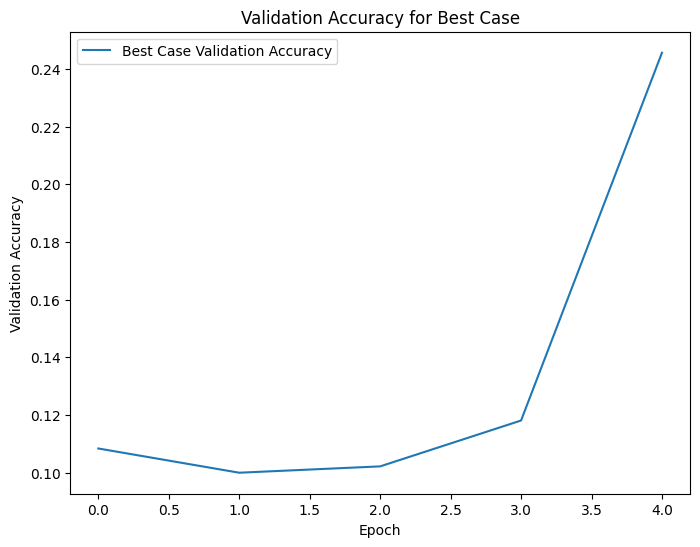

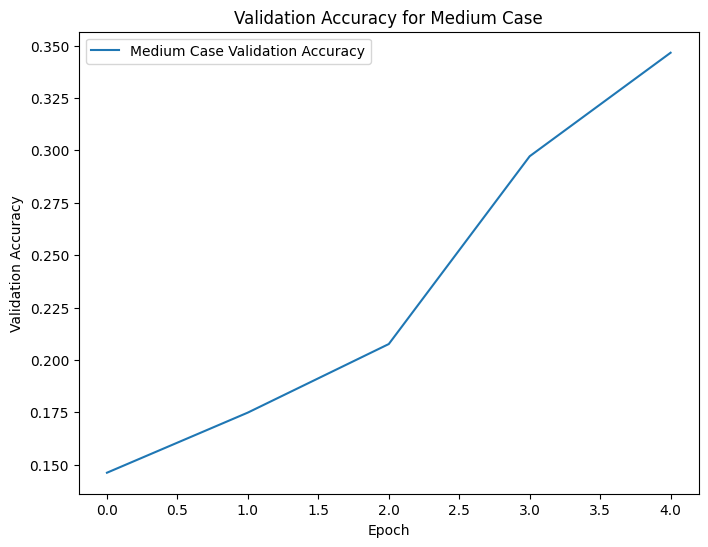

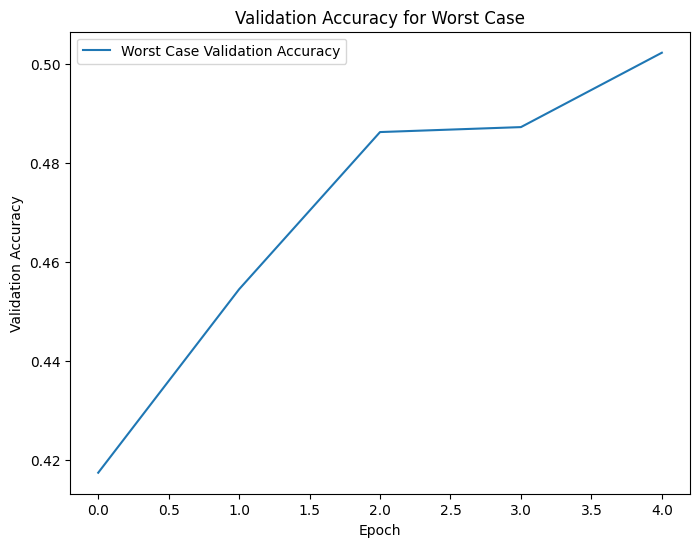

In [ ]:
results = {}

for scenario in scenarios:
    print(f"\nTraining for {scenario['name']}...")

    # Create model
    model = create_model(
        num_conv_layers=scenario['num_conv_layers'],
        dropout_rate=scenario['dropout_rate'],
        batch_norm=scenario['batch_norm'],
        activation_func=scenario['activation_func']
    )

    # Train the model with fewer epochs and larger batch size for faster training
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=128)

    # Store accuracy for comparison
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    results[scenario['name']] = {'history': history.history, 'test_acc': test_acc}

    print(f"{scenario['name']} Test Accuracy: {test_acc}")

for scenario in scenarios:
    plt.figure(figsize=(8, 6))
    plt.plot(results[scenario['name']]['history']['val_accuracy'], label=f"{scenario['name']} Validation Accuracy")

    plt.title(f'Validation Accuracy for {scenario["name"]}')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()